In [119]:
import urllib.request
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
os.environ["PUIDATA"]= "%s/001_PUI/PUIDATA"%os.getenv("HOME")
print("PATH TO PUIDATA", os.getenv("PUIDATA"))

PATH TO PUIDATA /nfshome/qg412/001_PUI/PUIDATA


# Academic Proxies

### Math Scores

In [3]:
url = "https://data.cityofnewyork.us/api/views/kha6-7i9i/rows.csv?accessType=DOWNLOAD"
urllib.request.urlretrieve(url, "math.csv")

('math.csv', <http.client.HTTPMessage at 0x7fd6da712f28>)

In [4]:
! mv "math.csv" $PUIDATA

In [5]:
math_all = pd.read_csv(os.getenv('PUIDATA') + "/" + "math.csv")

In [6]:
math_all['Grade'].unique()

array(['3', '4', '5', 'All Grades', '6', '7', '8'], dtype=object)

In [7]:
len(math_all)

23896

In [8]:
# https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
len(math_all['School Name'].unique().tolist())

1136

In [9]:
sch = pd.Series(math_all['School Name'])
sch.value_counts()

PS 212                                                             55
PS 253                                                             40
GOLDIE MAPLE ACADEMY                                               35
PS 308 CLARA CARDWELL                                              35
AMISTAD DUAL LANGUAGE SCHOOL                                       35
PS 282 PARK SLOPE                                                  35
PSIS 116 WILLIAM C HUGHLEY                                         35
PS 083 DONALD HERTZ                                                35
THE QUEENS COLLEGE SCHOOL FOR MATH SCIENCE AND TECHNOLOGY          35
PSIS 266                                                           35
PS 007 SAMUEL STERN                                                35
PSMS 194                                                           35
PS IS 155 NICHOLAS HERKIMER                                        35
PSIS 295                                                           35
PS 211              

In [10]:
len(sch)

23896

In [11]:
grade_math = pd.Series(math_all['Grade'])
grade_math.value_counts()

All Grades    5544
3             3761
4             3690
5             3664
6             2516
7             2428
8             2293
Name: Grade, dtype: int64

In [12]:
year = pd.Series(math_all['Year'])
year.value_counts()

2016    4866
2017    4824
2015    4812
2014    4735
2013    4659
Name: Year, dtype: int64

In [13]:
math_2015 = math_all[math_all["Year"] == 2015]
math_2015.reset_index(inplace=True)
math_2015.head()

,index,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,Level1_N,Level1_%,Level2_N,Level2_%,Level3_N,Level3_%,Level4_N,Level4_%,Level3+4_N,Level3+4_%
0,2,01M015,PS 015 ROBERTO CLEMENTE,3,2015,All Students,17,280,10,58.8,4,23.5,2,11.8,1,5.9,3,17.6
1,7,01M015,PS 015 ROBERTO CLEMENTE,4,2015,All Students,17,281,8,47.1,7,41.2,2,11.8,0,0.0,2,11.8
2,12,01M015,PS 015 ROBERTO CLEMENTE,5,2015,All Students,24,275,16,66.7,6,25.0,2,8.3,0,0.0,2,8.3
3,17,01M015,PS 015 ROBERTO CLEMENTE,All Grades,2015,All Students,58,278,34,58.6,17,29.3,6,10.3,1,1.7,7,12.1
4,22,01M019,PS 019 ASHER LEVY,3,2015,All Students,28,303,6,21.4,11,39.3,9,32.1,2,7.1,11,39.3


### English Scores

In [14]:
url = "https://data.cityofnewyork.us/api/views/jk35-yh5p/rows.csv?accessType=DOWNLOAD"
urllib.request.urlretrieve(url, "english.csv")

('english.csv', <http.client.HTTPMessage at 0x7fd6da52dd30>)

In [15]:
!mv "english.csv" $PUIDATA

In [16]:
english_all = pd.read_csv(os.getenv("PUIDATA") + "/" + "english.csv")

Cleaning

In [17]:
# keeping only entries in 2015
english_2015 = english_all[english_all['Year'] == 2015]

#keeping only all grades row which is a string
#code credit@ https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/
english_2015 = english_2015[english_2015['Grade'].str.match('All Grades')]
english_2015.reset_index(inplace=True)
english_2015.head()

,index,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,11,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2015,All Students,56,283,28,50,25,44.6,3,5.4,0,0,3,5.4
1,23,01M019,P.S. 019 ASHER LEVY,All Grades,2015,All Students,89,308,19,21.3,36,40.4,28,31.5,6,6.7,34,38.2
2,35,01M020,P.S. 020 ANNA SILVER,All Grades,2015,All Students,240,293,87,36.3,91,37.9,50,20.8,12,5,62,25.8
3,56,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,All Grades,2015,All Students,247,296,70,28.3,109,44.1,58,23.5,10,4,68,27.5
4,69,01M063,THE STAR ACADEMY - P.S.63,All Grades,2015,All Students,50,293,21,42,15,30,13,26,1,2,14,28


- 1 = Not Meeting Learning Standards
- 2 = Partially Meeting Learning Standards
- 3 = Meeting Learning Standards
- 4 = Meeting Learning Standards with Distinction
- Level 3 and 4 combined

In [18]:
english_2015.shape

(13203, 18)

In [19]:
english_2015.columns

Index(['index', 'DBN', 'School Name', 'Grade', 'Year', 'Category',
       'Number Tested', 'Mean Scale Score', '# Level 1', '% Level 1',
       '# Level 2', '% Level 2', '# Level 3', '% Level 3', '# Level 4',
       '% Level 4', '# Level 3+4', '% Level 3+4'],
      dtype='object')

In [20]:
english_2015.drop(['index', 'Grade','Number Tested','Category', '# Level 1', '% Level 1',
              '# Level 2', '% Level 2', '# Level 3', '% Level 3', '# Level 4',
              '% Level 4', '# Level 3+4', '% Level 3+4'], axis=1, inplace=True)

In [21]:
english_2015.head()

,DBN,School Name,Year,Mean Scale Score
0,01M015,P.S. 015 ROBERTO CLEMENTE,2015,283
1,01M019,P.S. 019 ASHER LEVY,2015,308
2,01M020,P.S. 020 ANNA SILVER,2015,293
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,2015,296
4,01M063,THE STAR ACADEMY - P.S.63,2015,293


In [22]:
english_2015.shape

(13203, 4)

# Non-Geographical Factors

### School Budget

#### SAM

In [23]:
url = "https://www.nycenet.edu/offices/finance_schools/budget/DSBPO/allocationmemo/fy14_15/FY15_PDF/SAM1_03_SBD/All.xls"
urllib.request.urlretrieve(url, "sam.xls")

('sam.xls', <http.client.HTTPMessage at 0x7fd6da3bb198>)

In [24]:
!mv "sam.xls" $PUIDATA

In [25]:
sam = pd.read_excel(os.getenv("PUIDATA") + "/" + "sam.xls" , header=None)
sam

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Location,01M015,01M019,01M020,01M034,01M063,01M064,01M110,01M134,01M137,...,01M448,01M450,01M458,01M509,01M515,01M539,01M650,01M696,01M839,NaN
1,School Name,P.S. 015 ROBERTO CLEMENTE,P.S. 019 ASHER LEVY,P.S. 020 ANNA SILVER,P.S. 034 FRANKLIN D. ROOSEVELT,The STAR Academy – P.S.63,P.S. 064 ROBERT SIMON,P.S. 110 FLORENCE NIGHTINGALE,P.S. 134 HENRIETTA SZOLD,P.S. 137 JOHN L. BERNSTEIN,...,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,East Side Community School,Forsyth Satellite Academy,Marta Valle High School,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,"New Explorations into Science, Technology and ...",CASCADES HIGH SCHOOL,BARD HIGH SCHOOL EARLY COLLEGE,TOMPKINS SQUARE MIDDLE SCHOOL,NaN
2,Status,Open,Open,Open,Open,Open,Open,Open,Open,Open,...,Open,Open,Open,Open,Open,Open,Open,Open,Open,NaN
3,Grade Span,K-6,K-6,K-6,K-9,K-6,K-6,K-6,K-6,K-6,...,9-12,6-12,9-12,9-12,9-12,K-12,9-12,9-12,5-9,NaN
4,Title I Status,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,NaN
5,"Register, October 31, 2013 Audited",173,249,577,374,161,254,380,285,184,...,297,647,211,394,546,1722,222,560,377,NaN
6,"Register, October 31, 2014 Projected",175,248,582,363,177,237,390,260,196,...,290,647,211,404,546,1759,219,554,360,NaN
7,Average Teacher Salary - FY15,68399,71534,75626,68497,68694,71312,77359,76557,69369,...,65634,69855,76145,70955,75987,63389,76556,74468,69329,NaN
8,Average Teacher Salary - FY14,71390,69279,76109,66612,67296,70162,75276,77082,72422,...,67448,69944,78805,69869,77900,64826,82425,72637,70028,Grand Total
9,SAM 01: Fair Student Funding (FSF),1258745,1359719,3086474,2646183,1363094,1589567,2024030,1803044,1525773,...,1995974,3842301,1489562,2444595,3917355,7267292,1350549,2945294,2138446,67144886


In [26]:
sam.drop(sam.index[2:94], inplace=True)
sam.drop(sam.index[0], inplace= True)
sam.reset_index(inplace=True)
sam

,index,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,1,School Name,P.S. 015 ROBERTO CLEMENTE,P.S. 019 ASHER LEVY,P.S. 020 ANNA SILVER,P.S. 034 FRANKLIN D. ROOSEVELT,The STAR Academy – P.S.63,P.S. 064 ROBERT SIMON,P.S. 110 FLORENCE NIGHTINGALE,P.S. 134 HENRIETTA SZOLD,...,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,East Side Community School,Forsyth Satellite Academy,Marta Valle High School,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,"New Explorations into Science, Technology and ...",CASCADES HIGH SCHOOL,BARD HIGH SCHOOL EARLY COLLEGE,TOMPKINS SQUARE MIDDLE SCHOOL,NaN
1,94,Grand Total,2609001,4055740,5372432,3791134,2597524,3203405,3347228,3181361,...,2890394,5127760,1838781,3488422,4879917,8197856,1761594,3517031,2862354,102632446


In [27]:
sam.drop(['index'], axis=1, inplace=True)
sam.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,School Name,P.S. 015 ROBERTO CLEMENTE,P.S. 019 ASHER LEVY,P.S. 020 ANNA SILVER,P.S. 034 FRANKLIN D. ROOSEVELT,The STAR Academy – P.S.63,P.S. 064 ROBERT SIMON,P.S. 110 FLORENCE NIGHTINGALE,P.S. 134 HENRIETTA SZOLD,P.S. 137 JOHN L. BERNSTEIN,...,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,East Side Community School,Forsyth Satellite Academy,Marta Valle High School,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,"New Explorations into Science, Technology and ...",CASCADES HIGH SCHOOL,BARD HIGH SCHOOL EARLY COLLEGE,TOMPKINS SQUARE MIDDLE SCHOOL,NaN
1,Grand Total,2609001,4055740,5372432,3791134,2597524,3203405,3347228,3181361,3119369,...,2890394,5127760,1838781,3488422,4879917,8197856,1761594,3517031,2862354,102632446


In [28]:
sam.set_index([0], inplace=True)
sam.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,,,,,,,,,,,,,,,,,,,,,
School Name,P.S. 015 ROBERTO CLEMENTE,P.S. 019 ASHER LEVY,P.S. 020 ANNA SILVER,P.S. 034 FRANKLIN D. ROOSEVELT,The STAR Academy – P.S.63,P.S. 064 ROBERT SIMON,P.S. 110 FLORENCE NIGHTINGALE,P.S. 134 HENRIETTA SZOLD,P.S. 137 JOHN L. BERNSTEIN,P.S. 140 NATHAN STRAUS,...,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,East Side Community School,Forsyth Satellite Academy,Marta Valle High School,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,"New Explorations into Science, Technology and ...",CASCADES HIGH SCHOOL,BARD HIGH SCHOOL EARLY COLLEGE,TOMPKINS SQUARE MIDDLE SCHOOL,NaN
Grand Total,2609001,4055740,5372432,3791134,2597524,3203405,3347228,3181361,3119369,3600720,...,2890394,5127760,1838781,3488422,4879917,8197856,1761594,3517031,2862354,102632446


In [29]:
sam1 = sam.transpose()
sam1.head()

,School Name,Grand Total
1,P.S. 015 ROBERTO CLEMENTE,2609001
2,P.S. 019 ASHER LEVY,4055740
3,P.S. 020 ANNA SILVER,5372432
4,P.S. 034 FRANKLIN D. ROOSEVELT,3791134
5,The STAR Academy – P.S.63,2597524


In [30]:
sam1.rename(columns = {'Grand Total':'Sam'}, inplace=True)
sam1['School Name'] = sam1['School Name'].str.upper()
sam1.head()

,School Name,Sam
1,P.S. 015 ROBERTO CLEMENTE,2609001
2,P.S. 019 ASHER LEVY,4055740
3,P.S. 020 ANNA SILVER,5372432
4,P.S. 034 FRANKLIN D. ROOSEVELT,3791134
5,THE STAR ACADEMY – P.S.63,2597524


#### FSF

In [31]:
url = "https://data.cityofnewyork.us/api/views/ven4-h25u/rows.csv?accessType=DOWNLOAD"
urllib.request.urlretrieve(url, "fsf.csv")

('fsf.csv', <http.client.HTTPMessage at 0x7fd6d96d4940>)

In [32]:
!mv "fsf.csv" $PUIDATA

In [33]:
fsf = pd.read_csv(os.getenv("PUIDATA") + "/" + "fsf.csv")
fsf.head()

,Fiscal_Year,Location,S1: Label a: FY14 Revised Base,S1: Label b: FSF & TL 09 C4E CTT,S1: Label c: FSF Over Formula,S2: Label d: FSF Preliminary,S2: Label a: FY14 Revised Base,S2: Label f: Register Change,S2: Label g: Teacher Salary Growth,S2: Label h: New School Foundation,...,S3: Foundation,S3: Label d - Foundation,S3: Label i - Foundation,S3: Label j: FSF Final%,S4: Label d: FY14 FSF Initial,S4: AC Name: FSF (HS),S4: AC Name: TL09 C4E CTT (HS),S4: AC Name: Funds Over Formula,S5: TL SE Transitional Funding,As_Of_Date
0,2015,K001,5957603.0,5957603.0,0.0,5858476.18,5957603.0,-99126.82,0.0,0.0,...,225000.0,5633476.18,6856416.99,0.8216,5858476.0,5858476.0,0.0,0.0,0.0,05/29/2014
1,2015,K002,2565500.0,2565500.0,0.0,2514000.62,2565500.0,-51499.38,0.0,0.0,...,225000.0,2289000.62,2812276.59,0.8139,2514001.0,2514001.0,0.0,0.0,104611.0,05/29/2014
2,2015,K003,2364807.0,2364807.0,0.0,2176535.16,2364807.0,-188271.84,0.0,0.0,...,225000.0,1951535.16,2225195.30,0.8770,2176535.0,2104797.0,71738.0,0.0,37397.0,05/29/2014
3,2015,K005,1711158.0,1711158.0,0.0,1589001.81,1711158.0,-122156.19,0.0,0.0,...,225000.0,1364001.81,1482282.85,0.9202,1589002.0,1589002.0,0.0,0.0,18339.0,05/29/2014
4,2015,K006,3771012.0,3771012.0,0.0,3634372.42,3771012.0,-136639.58,0.0,0.0,...,225000.0,3409372.42,3899758.11,0.8743,3634373.0,3562635.0,71738.0,0.0,15830.0,05/29/2014


In [34]:
fsf.columns

Index(['Fiscal_Year', 'Location', 'S1: Label a: FY14 Revised Base ',
       'S1: Label b: FSF & TL 09 C4E CTT ', 'S1: Label c: FSF Over Formula',
       'S2: Label d: FSF Preliminary', 'S2: Label a: FY14 Revised Base',
       'S2: Label f: Register Change', 'S2: Label g: Teacher Salary Growth',
       'S2: Label h: New School Foundation', 'S3: Label i: FY14 FSF at 100%',
       'S3: Foundation  ', 'S3: Label d - Foundation',
       'S3: Label i - Foundation', 'S3: Label j: FSF Final%',
       'S4: Label d: FY14 FSF Initial', 'S4: AC Name: FSF (HS)',
       'S4: AC Name: TL09 C4E CTT (HS)', 'S4: AC Name: Funds Over Formula',
       'S5: TL SE Transitional Funding', 'As_Of_Date'],
      dtype='object')

In [35]:
fsf.drop(['Fiscal_Year',
       'S1: Label b: FSF & TL 09 C4E CTT ', 'S1: Label c: FSF Over Formula',
       'S2: Label d: FSF Preliminary', 'S2: Label a: FY14 Revised Base',
       'S2: Label f: Register Change', 'S2: Label g: Teacher Salary Growth',
       'S2: Label h: New School Foundation', 'S3: Label i: FY14 FSF at 100%',
       'S3: Foundation  ', 'S3: Label d - Foundation',
       'S3: Label i - Foundation', 'S3: Label j: FSF Final%',
       'S4: Label d: FY14 FSF Initial', 'S4: AC Name: FSF (HS)',
       'S4: AC Name: TL09 C4E CTT (HS)', 'S4: AC Name: Funds Over Formula',
       'S5: TL SE Transitional Funding', 'As_Of_Date'], axis=1, inplace=True)

In [36]:
fsf.head()

,Location,S1: Label a: FY14 Revised Base
0,K001,5957603.0
1,K002,2565500.0
2,K003,2364807.0
3,K005,1711158.0
4,K006,3771012.0


In [37]:
fsf.rename(columns = {'Location':'Location Code'}, inplace=True)
fsf.columns

Index(['Location Code', 'S1: Label a: FY14 Revised Base '], dtype='object')

In [38]:
fsf.rename(columns = {'S1: Label a: FY14 Revised Base ':'ftf'}, inplace=True)

In [39]:
fsf.head()

,Location Code,ftf
0,K001,5957603.0
1,K002,2565500.0
2,K003,2364807.0
3,K005,1711158.0
4,K006,3771012.0


### School Safety Report

In [40]:
url = "https://data.cityofnewyork.us/api/views/qybk-bjjc/rows.csv?accessType=DOWNLOAD"
urllib.request.urlretrieve(url, "safety.csv")

('safety.csv', <http.client.HTTPMessage at 0x7fd6d96e1978>)

In [41]:
!mv "safety.csv" $PUIDATA

In [42]:
safety = pd.read_csv(os.getenv("PUIDATA") + "/safety.csv")

In [43]:
#dropping rows based on labels
#code credit @http://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/
safety_2015 = safety[safety["School Year"] != "2013-14"]
safety_2015 = safety_2015[safety_2015["School Year"] != "2015-16"]
safety_2015.reset_index(inplace=True)
safety_2015.head()

,index,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,32,2014-15,K932,07X695,PASSAGES ACADEMY AT BELMONT(BN),X695,560 BROOK AVENUE,K,7.0,395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,672,2014-15,K319,14K319,P.S. 319,K319,360 KEAP STREET,K,14.0,142,...,BROOKLYN,11211.0,40.709674,-73.954217,1.0,34.0,527.0,3063189.0,3.024240e+09,North Side-South Side ...
2,811,2014-15,Q031,26Q031,P.S. 031 Bayside,Q031,211-45 46 ROAD,Q,26.0,561,...,QUEENS,11361.0,40.757064,-73.770122,11.0,19.0,1447.0,4156949.0,4.073160e+09,Bayside-Bayside Hills ...
3,1333,2014-15,Q154,25Q154,P.S. 154 Queens,Q154,75-02 162 STREET,Q,25.0,739,...,QUEENS,11366.0,40.726769,-73.806894,8.0,24.0,1257.0,4148003.0,4.068340e+09,Kew Gardens Hills ...
4,1350,2014-15,Q155,27Q155,P.S. 155,Q155,130-02 115 AVENUE,Q,27.0,571,...,QUEENS,11420.0,40.679560,-73.810600,10.0,28.0,176.0,4252357.0,4.116730e+09,South Ozone Park ...


In [44]:
safety_2015.columns

Index(['index', 'School Year', 'Building Code', 'DBN', 'Location Name',
       'Location Code', 'Address', 'Borough', 'Geographical District Code',
       'Register', 'Building Name', '# Schools', 'Schools in Building',
       'Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N', 'ENGroupA', 'RangeA',
       'AvgOfMajor N', 'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N',
       'AvgOfVio N', 'Borough Name', 'Postcode', 'Latitude', 'Longitude',
       'Community Board', 'Council District ', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [45]:
#summing all crimes number into an overall one 
safety_2015['Crimes_All'] = safety_2015['Major N'] + safety_2015['Oth N'] + safety_2015['NoCrim N'] + safety_2015['Prop N'] + safety_2015['Vio N']

In [46]:
safety_2015.drop(['index', 'School Year', 'Building Code', 'Location Name',
       'Address', 'Borough', 'Geographical District Code',
       'Register', 'Building Name', '# Schools', 'Schools in Building',
       'Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N', 'ENGroupA', 'RangeA',
       'AvgOfMajor N', 'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N',
       'AvgOfVio N', 'Borough Name', 'Postcode', 'Latitude', 'Longitude',
       'Community Board', 'Council District ', 'Census Tract', 'BIN', 'BBL',
       'NTA'], axis=1, inplace=True)

In [47]:
safety_2015.head()

,DBN,Location Code,Crimes_All
0,07X695,X695,3.0
1,14K319,K319,0.0
2,26Q031,Q031,0.0
3,25Q154,Q154,0.0
4,27Q155,Q155,0.0


### Class Size

In [48]:
url = "https://data.cityofnewyork.us/api/views/rtws-c2ai/rows.csv?accessType=DOWNLOAD"
urllib.request.urlretrieve(url, "class_size.csv")

('class_size.csv', <http.client.HTTPMessage at 0x7fd6d9c9a3c8>)

In [49]:
!mv "class_size.csv" $PUIDATA

In [50]:
class_size = pd.read_csv(os.getenv("PUIDATA") + "/" + "class_size.csv")
class_size.head()

,DBN,School Name,School Pupil-Teacher Ratio
0,15K001,P.S. 001 THE BERGEN,13.4
1,12X691,BRONX LITTLE SCHOOL,12.0
2,11X567,LINDEN TREE ELEMENTARY SCHOOL,16.9
3,09X555,MOUNT EDEN CHILDREN'S ACADEMY,18.1
4,12X536,PS 536,14.8


In [51]:
class_size.shape

(1571, 3)

### iZone Schools

In [52]:
url = "https://data.cityofnewyork.us/api/views/g993-cbry/rows.csv?accessType=DOWNLOAD"
urllib.request.urlretrieve(url, "izone.csv")

('izone.csv', <http.client.HTTPMessage at 0x7fd6d7e21d30>)

In [53]:
!mv "izone.csv" $PUIDATA

In [54]:
izone = pd.read_csv(os.getenv("PUIDATA") + "/izone.csv")

#upper casing all school name for joining later
# code credit @ https://stackoverflow.com/questions/31269216/applying-uppercase-to-a-column-in-pandas-dataframe
izone['School Name'] = izone['School Name'].str.upper()
izone.head()

,School Name,12-13 Initative,Location Category Description,Borough
0,BRONX MIDDLE SCHOOL OF ACADEMIC AND CAREER TEC...,InnovateNYC,Junior High-Intermediate-Middle,Bronx
1,P.S. 005 PORT MORRIS,InnovateNYC,Elementary,Bronx
2,P.S. 016 JOHN J. DRISCOLL,InnovateNYC,Elementary,Staten Island
3,P.S. 020 CLINTON HILL,InnovateNYC,Elementary,Brooklyn
4,P.S. 025 EUBIE BLAKE SCHOOL,InnovateNYC,Elementary,Brooklyn


In [55]:
izone['izone'] = 1

In [56]:
izone.head()

,School Name,12-13 Initative,Location Category Description,Borough,izone
0,BRONX MIDDLE SCHOOL OF ACADEMIC AND CAREER TEC...,InnovateNYC,Junior High-Intermediate-Middle,Bronx,1
1,P.S. 005 PORT MORRIS,InnovateNYC,Elementary,Bronx,1
2,P.S. 016 JOHN J. DRISCOLL,InnovateNYC,Elementary,Staten Island,1
3,P.S. 020 CLINTON HILL,InnovateNYC,Elementary,Brooklyn,1
4,P.S. 025 EUBIE BLAKE SCHOOL,InnovateNYC,Elementary,Brooklyn,1


In [57]:
izone.columns

Index(['School Name', ' 12-13 Initative', 'Location Category Description',
       'Borough', 'izone'],
      dtype='object')

In [58]:
izone.drop(['Location Category Description','Borough', ' 12-13 Initative'], axis=1, inplace=True)

In [59]:
izone.head()

,School Name,izone
0,BRONX MIDDLE SCHOOL OF ACADEMIC AND CAREER TEC...,1
1,P.S. 005 PORT MORRIS,1
2,P.S. 016 JOHN J. DRISCOLL,1
3,P.S. 020 CLINTON HILL,1
4,P.S. 025 EUBIE BLAKE SCHOOL,1


### Adolescent Literacy

In [60]:
url = 'https://data.cityofnewyork.us/api/views/a8rp-fpnn/rows.csv?accessType=DOWNLOAD'
urllib.request.urlretrieve(url, 'literacy.csv')

('literacy.csv', <http.client.HTTPMessage at 0x7fd6d98b3a90>)

In [61]:
!mv 'literacy.csv' $PUIDATA

In [62]:
literacy = pd.read_csv(os.getenv('PUIDATA') + "/literacy.csv")
literacy.head()

,PROGRAM TYPE,PROGRAM,SITE NAME,BOROUGH / COMMUNITY,AGENCY,Contact Number,Grade Level / Age Group,Location 1,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Reading & Writing,Adolescent Literacy,I.S. 126- Astoria Intermediate School,Queens,Jacob Riis Neighborhood Settlement,718.204.6797,grades 6 to 8,"31 51 21st Street\nQueens, NEW YORK 11101\n(40...",11101,40.766264,-73.930709,1.0,22.0,77.0,4006382.0,4.005530e+09,Astoria ...
1,Reading & Writing,Adolescent Literacy,I.S.168 - Parsons School,Queens,The Child Center of NY,718.458.4243 ext. 205,grades 6 to 8,"158 40 76th Road\nQueens, NEW YORK 11366\n(40....",11366,40.724458,-73.810216,8.0,24.0,1257.0,4147847.0,4.068260e+09,Kew Gardens Hills ...
2,Reading & Writing,Adolescent Literacy,JHS 22- Jordan L Mott School,Bronx,Supportive Childrens Advocacy Network (SCAN),212.683.2522,grades 6 to 8,"270 167th Street\nBronx, NEW YORK 10456\n(40.8...",10456,40.833131,-73.914027,4.0,16.0,175.0,2002410.0,2.024380e+09,East Concourse-Concourse Village ...
3,Reading & Writing,Adolescent Literacy,K 533- School for Democracy and Leadership 600...,Brooklyn,CAMBA,718.282.5575,grades 6 to 8,NaN,11203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Reading & Writing,Adolescent Literacy,M.S. 368- IN-Tech Academy,Bronx,Creative Arts Team/CUNY,212.652.2800,grades 6 to 8,Tibbett Avenue Bronx NEW YORK10463\n(40.878349...,10463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
literacy.columns

Index(['PROGRAM TYPE', 'PROGRAM', 'SITE NAME', 'BOROUGH / COMMUNITY', 'AGENCY',
       'Contact Number', 'Grade Level / Age Group ', 'Location 1', 'Postcode',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [64]:
literacy.drop(['PROGRAM TYPE', 'PROGRAM', 'BOROUGH / COMMUNITY', 'AGENCY',
       'Contact Number', 'Grade Level / Age Group ', 'Location 1', 'Postcode',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'], axis=1, inplace=True)

In [65]:
literacy['Lit_Prog'] = 1

In [66]:
literacy.rename(columns = {'SITE NAME':'School Name'}, inplace=True)

In [67]:
literacy['School Name'] = literacy['School Name'].str.upper()

In [68]:
literacy

,School Name,Lit_Prog
0,I.S. 126- ASTORIA INTERMEDIATE SCHOOL,1
1,I.S.168 - PARSONS SCHOOL,1
2,JHS 22- JORDAN L MOTT SCHOOL,1
3,K 533- SCHOOL FOR DEMOCRACY AND LEADERSHIP 600...,1
4,M.S. 368- IN-TECH ACADEMY,1
5,M.S. 635- ACADEMY FOR ENVIORNMENTAL SCIENCES,1
6,M.S. 860 FREDERICK DOUGLASS ACADEMY II,1
7,MS 324 - PATRIA MIRABAL SCHOOL,1
8,MS 35- DECATUR CLEARPOOL SCHOOL,1
9,Q 705- THE RENAISSANCE CHARTER SCHOOL,1


### Attendance

In [69]:
url = "https://data.cityofnewyork.us/api/views/wed3-5i35/rows.csv?accessType=DOWNLOAD"
urllib.request.urlretrieve(url, "attend.csv")

('attend.csv', <http.client.HTTPMessage at 0x7fd6d7e41a58>)

In [70]:
!mv "attend.csv" $PUIDATA

In [71]:
attend_all = pd.read_csv(os.getenv('PUIDATA') + "/attend.csv")
attend_all.head()

,School,MonthCode,CalMonth,SchoolYear,GradeLevel,GradeSort,RosterCount,Present,Absent,Released
0,14K257,4,Dec,2012 - 2013,0K,0,106,1456,126,0
1,14K257,4,Dec,2014 - 2015,PK,-1,66,974,148,0
2,14K257,4,Dec,2013 - 2014,PK,-1,53,677,65,53
3,14K257,4,Dec,2016 - 2017,PK,-1,58,860,95,0
4,14K257,4,Dec,2015 - 2016,PK,-1,61,881,95,61


In [72]:
year = pd.Series(attend_all['SchoolYear'])
year.value_counts()

2016 - 2017    91983
2015 - 2016    91692
2014 - 2015    91014
2013 - 2014    89885
2012 - 2013    89041
Name: SchoolYear, dtype: int64

Cleaning

In [73]:
#selecting only 2014-2015 academic year
# code credit @ https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/
attend = attend_all[attend_all['SchoolYear'].str.match('2014 - 2015')]
attend.reset_index(inplace=True)
attend.head()

,index,School,MonthCode,CalMonth,SchoolYear,GradeLevel,GradeSort,RosterCount,Present,Absent,Released
0,1,14K257,4,Dec,2014 - 2015,PK,-1,66,974,148,0
1,9,14K297,5,Jan,2014 - 2015,01,1,32,467,100,0
2,11,14K297,5,Jan,2014 - 2015,02,2,41,662,76,0
3,17,14K297,5,Jan,2014 - 2015,03,3,37,576,72,0
4,22,14K297,5,Jan,2014 - 2015,04,4,38,577,100,0


In [74]:
attend = pd.DataFrame(attend.groupby(by='School')['Absent'].sum()).reset_index()

In [75]:
attend.rename(columns = {'School':'DBN'}, inplace=True)

In [76]:
attend.head()

,DBN,Absent
0,01M015,2374
1,01M019,4034
2,01M020,6754
3,01M034,6063
4,01M063,2739


# Geographical Factors

### PUMA Poverty

In [77]:
url = 'https://github.com/qygoh/PUI_EC/raw/master/ACS_15_1YR_GCT1701.ST50.zip'
urllib.request.urlretrieve(url, 'poverty.zip')

('poverty.zip', <http.client.HTTPMessage at 0x7fd6d7e46ef0>)

In [78]:
!unzip poverty.zip -d $PUIDATA

Archive:  poverty.zip
replace /nfshome/qg412/001_PUI/PUIDATA/ACS_15_1YR_GCT1701.ST50_with_ann.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [79]:
!mv 'poverty.zip' $PUIDATA

In [80]:
poverty = pd.read_csv(os.getenv("PUIDATA") + "/ACS_17_1YR_GCT1701.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])
poverty.head()

,GCT_STUB.target-geo-id2,HC01,HC02
0,Target Geo Id2,Percent,Margin of Error
1,01,16.9,0.5
2,0100100,15.8,2.1
3,0100200,9.8,2.4
4,0100301,13.3,3.1


In [81]:
# dropping the additional column
poverty.drop(0, inplace=True)
poverty.head()

,GCT_STUB.target-geo-id2,HC01,HC02
1,01,16.9,0.5
2,0100100,15.8,2.1
3,0100200,9.8,2.4
4,0100301,13.3,3.1
5,0100302,20.5,4.0


In [82]:
# convert the GCT column into integer
poverty['GCT_STUB.target-geo-id2'] = poverty['GCT_STUB.target-geo-id2'].astype(int)
poverty['HC01'] = poverty['HC01'].astype(float)

#creating a gid column to be joined to puma later 
poverty["gid"] = poverty['GCT_STUB.target-geo-id2'] - 3600000
poverty.head()

,GCT_STUB.target-geo-id2,HC01,HC02,gid
1,1,16.9,0.5,-3599999
2,100100,15.8,2.1,-3499900
3,100200,9.8,2.4,-3499800
4,100301,13.3,3.1,-3499699
5,100302,20.5,4.0,-3499698


### School Points

contains the location identifier for each school

In [83]:
url = "https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip"
urllib.request.urlretrieve(url, "schpts.zip")

('schpts.zip', <http.client.HTTPMessage at 0x7fd6d99f2e10>)

In [84]:
#unzip to a specified folder in PUIDATA
os.system("unzip " "schpts.zip" + " -d " + os.getenv('PUIDATA'))

256

In [85]:
# renaming the files to a standardized name

for filename in os.listdir(os.getenv('PUIDATA') + "/schpts"):
    if filename.endswith(".shp"):
        os.rename(os.getenv('PUIDATA') + "/schpts/" + filename, os.getenv('PUIDATA') + "/schpts/" + "schpts.shp")
    if filename.endswith(".dbf"):
        os.rename(os.getenv('PUIDATA') + "/schpts/" + filename, os.getenv('PUIDATA') + "/schpts/" + "schpts.dbf")
    if filename.endswith(".prj"):
        os.rename(os.getenv('PUIDATA') + "/schpts/" + filename, os.getenv('PUIDATA') + "/schpts/" + "schpts.prj")
    if filename.endswith(".shx"):
        os.rename(os.getenv('PUIDATA') + "/schpts/" + filename, os.getenv('PUIDATA') + "/schpts/" + "schpts.shx")

In [86]:
schpts = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/schpts" + "/schpts.shp")
schpts.head()

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.0541713729 175780.758994163)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.1364296663 178431.910832498)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.9830063033 156323.3612131244)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.6813609767 160709.9926236183)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.0729096507 158329.5913366843)


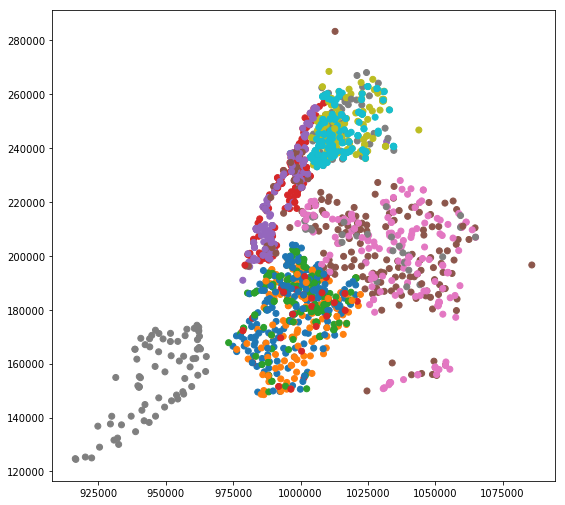

In [87]:
schpts.plot(column="LOC_CODE", figsize=(9,9))

In [88]:
name = schpts['SCHOOLNAME'].unique().tolist()

# Joining everything together

Adding class size to english score

In [89]:
eng_class = pd.merge(english_2015, class_size, on="DBN", how='left')

In [90]:
eng_class.columns

Index(['DBN', 'School Name_x', 'Year', 'Mean Scale Score', 'School Name_y',
       'School Pupil-Teacher Ratio'],
      dtype='object')

In [91]:
eng_class.drop(['Year', 'School Name_y'], axis=1, inplace=True)

In [92]:
eng_class.rename(columns = {'School Name_x':'School Name'}, inplace=True)

In [93]:
eng_class.head()

,DBN,School Name,Mean Scale Score,School Pupil-Teacher Ratio
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2
1,01M019,P.S. 019 ASHER LEVY,308,7.0
2,01M020,P.S. 020 ANNA SILVER,293,13.3
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6


Adding izone

In [94]:
eng_class_izone = eng_class.merge(izone, on='School Name', how='left')

In [95]:
eng_class_izone.izone.unique()

array([ nan,   1.])

In [96]:
eng_class_izone.head()

,DBN,School Name,Mean Scale Score,School Pupil-Teacher Ratio,izone
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2,NaN
1,01M019,P.S. 019 ASHER LEVY,308,7.0,NaN
2,01M020,P.S. 020 ANNA SILVER,293,13.3,NaN
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9,NaN
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6,NaN


Adding literacy

In [97]:
eng_class_izone_literacy = eng_class_izone.merge(literacy, on='School Name', how='left')

In [98]:
eng_class_izone_literacy.Lit_Prog.unique()

array([ nan])

I DOUBLED CHECKED WITH RAW DATA- APPARENTLY THERE WAS NO SCHOOLS WITH ENG SCORE THAT HAVE THE LITERACY PROG. SO THIS FACTOR WILL BE DROPPED! 

Adding safety

In [99]:
eng_class_izone_safety = pd.merge(eng_class_izone, safety_2015, on="DBN", how='left')
eng_class_izone_safety.head()

,DBN,School Name,Mean Scale Score,School Pupil-Teacher Ratio,izone,Location Code,Crimes_All
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2,NaN,M015,3.0
1,01M019,P.S. 019 ASHER LEVY,308,7.0,NaN,M019,NaN
2,01M020,P.S. 020 ANNA SILVER,293,13.3,NaN,M020,7.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9,NaN,M034,7.0
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6,NaN,M063,NaN


Adding Attendance

In [100]:
eng_class_izone_safety_attend = pd.merge(eng_class_izone_safety, attend, on="DBN", how='left')
eng_class_izone_safety_attend.head()

,DBN,School Name,Mean Scale Score,School Pupil-Teacher Ratio,izone,Location Code,Crimes_All,Absent
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2,NaN,M015,3.0,2374.0
1,01M019,P.S. 019 ASHER LEVY,308,7.0,NaN,M019,NaN,4034.0
2,01M020,P.S. 020 ANNA SILVER,293,13.3,NaN,M020,7.0,6754.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9,NaN,M034,7.0,6063.0
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6,NaN,M063,NaN,2739.0


Adding Budget (SAM)

In [101]:
eng_class_izone_safety_attend_sam = pd.merge(eng_class_izone_safety_attend, sam1, on="School Name", how='left')

In [102]:
eng_class_izone_safety_attend_sam.head()

,DBN,School Name,Mean Scale Score,School Pupil-Teacher Ratio,izone,Location Code,Crimes_All,Absent,Sam
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2,NaN,M015,3.0,2374.0,2609001
1,01M019,P.S. 019 ASHER LEVY,308,7.0,NaN,M019,NaN,4034.0,4055740
2,01M020,P.S. 020 ANNA SILVER,293,13.3,NaN,M020,7.0,6754.0,5372432
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9,NaN,M034,7.0,6063.0,3791134
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6,NaN,M063,NaN,2739.0,NaN


Adding Budget (ftf)

In [103]:
eng_class_izone_safety_attend_sam_fsf = pd.merge(eng_class_izone_safety_attend_sam, fsf, on="Location Code", how='left')
eng_class_izone_safety_attend_sam_fsf.head()

,DBN,School Name,Mean Scale Score,School Pupil-Teacher Ratio,izone,Location Code,Crimes_All,Absent,Sam,ftf
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2,NaN,M015,3.0,2374.0,2609001,1308373.0
1,01M019,P.S. 019 ASHER LEVY,308,7.0,NaN,M019,NaN,4034.0,4055740,1407255.0
2,01M020,P.S. 020 ANNA SILVER,293,13.3,NaN,M020,7.0,6754.0,5372432,3109552.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9,NaN,M034,7.0,6063.0,3791134,2814304.0
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6,NaN,M063,NaN,2739.0,NaN,1298350.0


In [104]:
eng_class_izone_safety_attend_sam_fsf['Budget'] = eng_class_izone_safety_attend_sam_fsf['ftf'] + eng_class_izone_safety_attend_sam_fsf['Sam']

In [105]:
eng_class_izone_safety_attend_sam_fsf.columns

Index(['DBN', 'School Name', 'Mean Scale Score', 'School Pupil-Teacher Ratio',
       'izone', 'Location Code', 'Crimes_All', 'Absent', 'Sam', 'ftf',
       'Budget'],
      dtype='object')

In [106]:
eng_class_izone_safety_attend_budget = eng_class_izone_safety_attend_sam_fsf.drop(['Sam', 'ftf'], axis=1)

In [107]:
eng_class_izone_safety_attend_budget.head()

,DBN,School Name,Mean Scale Score,School Pupil-Teacher Ratio,izone,Location Code,Crimes_All,Absent,Budget
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2,NaN,M015,3.0,2374.0,3.91737e+06
1,01M019,P.S. 019 ASHER LEVY,308,7.0,NaN,M019,NaN,4034.0,5.463e+06
2,01M020,P.S. 020 ANNA SILVER,293,13.3,NaN,M020,7.0,6754.0,8.48198e+06
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9,NaN,M034,7.0,6063.0,6.60544e+06
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6,NaN,M063,NaN,2739.0,NaN


In [108]:
eng_class_izone_safety_attend_budget.rename(columns = {'Mean Scale Score':'eng_score',
                                                      'School Pupil-Teacher Ratio':'class_size'}, inplace=True)

In [109]:
eng_class_izone_safety_attend_budget.head()

,DBN,School Name,eng_score,class_size,izone,Location Code,Crimes_All,Absent,Budget
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2,NaN,M015,3.0,2374.0,3.91737e+06
1,01M019,P.S. 019 ASHER LEVY,308,7.0,NaN,M019,NaN,4034.0,5.463e+06
2,01M020,P.S. 020 ANNA SILVER,293,13.3,NaN,M020,7.0,6754.0,8.48198e+06
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9,NaN,M034,7.0,6063.0,6.60544e+06
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6,NaN,M063,NaN,2739.0,NaN


In [110]:
eng_class_izone_safety_attend_budget = eng_class_izone_safety_attend_budget.fillna(0)

In [111]:
eng_class_izone_safety_attend_budget = eng_class_izone_safety_attend_budget.drop_duplicates()
eng_class_izone_safety_attend_budget

,DBN,School Name,eng_score,class_size,izone,Location Code,Crimes_All,Absent,Budget
0,01M015,P.S. 015 ROBERTO CLEMENTE,283,9.2,0.0,M015,3.0,2374.0,3917374.0
1,01M019,P.S. 019 ASHER LEVY,308,7.0,0.0,M019,0.0,4034.0,5462995.0
2,01M020,P.S. 020 ANNA SILVER,293,13.3,0.0,M020,7.0,6754.0,8481984.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,296,10.9,0.0,M034,7.0,6063.0,6605438.0
4,01M063,THE STAR ACADEMY - P.S.63,293,10.6,0.0,M063,0.0,2739.0,0.0
5,01M064,P.S. 064 ROBERT SIMON,291,9.3,0.0,M064,0.0,4413.0,4983501.0
6,01M110,P.S. 110 FLORENCE NIGHTINGALE,308,14.7,0.0,M110,2.0,3956.0,5318964.0
7,01M134,P.S. 134 HENRIETTA SZOLD,288,9.8,0.0,M134,0.0,4369.0,5156453.0
8,01M137,P.S. 137 JOHN L. BERNSTEIN,274,10.1,0.0,M137,0.0,3138.0,4595454.0
9,01M140,P.S. 140 NATHAN STRAUS,284,12.4,0.0,M140,1.0,5499.0,5972127.0


In [112]:
eng_class_izone_safety_attend_budget.columns

Index(['DBN', 'School Name', 'eng_score', 'class_size', 'izone',
       'Location Code', 'Crimes_All', 'Absent', 'Budget'],
      dtype='object')

In [130]:
eng_class_izone_safety_attend_budget.to_csv('csv.csv')

# Regression

In [115]:
y= eng_class_izone_safety_attend_budget['eng_score']
x1 = eng_class_izone_safety_attend_budget['class_size']
#x2 = eng_class_izone_safety_attend_budget['Crimes_all']
x3 = eng_class_izone_safety_attend_budget['Budget']
x4 = eng_class_izone_safety_attend_budget['Absent']
X = x1+x3+x4

In [123]:
y= eng_class_izone_safety_attend_budget['eng_score']

In [129]:
mod = sm.OLS(X, sm.add_constant(y, prepend=False)).fit()
mod.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).